# Question 2 - OPERATIONS
Predict What Year 20 Will Look like for A, H, and B
We'll look at the following areas:
* Operations Data: Rebate, Delivery Time, Number of Outlets Carrying the Brand

In [11]:
#let's grab a few packages for stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Set PredictionYear to 20 as a global variable (we'll use this later for regressions)
predictionYear = 20 

#Load the pricing data set for the three teams
df = pd.read_csv('Operations.csv')
df

,ID,YEAR,A_EU_REBATE,H_EU_REBATE,B_EU_REBATE,A_EU_DELIVERY_TIME,H_EU_DELIVERY_TIME,B_EU_DELIVERY_TIME,A_EU_OUTLETS,H_EU_OUTLETS,B_EU_OUTLETS
0,4,14,5,0,5,1,1,2,869,1390,2990
1,5,15,6,0,4,1,1,2,772,1208,2570
2,6,16,7,0,4,1,1,2,669,1062,2133
3,7,17,8,4,4,1,1,2,586,935,1795


## Functions for Re-Use

In [18]:
#1. Slope Intercept Function
#Function to find the slope intercept of a first degree polynomial
def getSlope(x,y): #pass in the x value, y value, and a string for printing
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4) #compute the slope
    return slope, intercept

#2. Print Slope as Formulas
#Function to print the slope
def printSlope(x,y,string):
    slope, intercept = np.polyfit(x,y,1).round(decimals = 4)
    printed_string = string + '= ' + str(slope) + 'x + ' + str(intercept)
    return printed_string 

#3. Hypothetical Slope and Intercept from our data
x_theor = np.array([14,predictionYear]) #set x_theor as it will be used in all our Linear Models
def getYTheor(slope, x_theor, intercept): #pass in the slope, x_theor, and intercept
    y_theor = slope * x_theor + intercept
    return y_theor

#4. Print Predicted Year using Hypothetical Slope and Intercept
def printPrediction(slope, intercept, string): 
    prediction = 'Year ' + str(predictionYear) + ' ' + string +' predicted value: ' + str(slope * predictionYear + intercept)
    return prediction

### Find The Slope Intercept for each variable

In [19]:
#variable assignments
x = np.array(df['YEAR'])
y_A_eu_rebate = np.array(df['A_EU_REBATE'])
y_H_eu_rebate = np.array(df['H_EU_REBATE'])
y_B_eu_rebate = np.array(df['B_EU_REBATE'])
y_A_eu_delivery = np.array(df['A_EU_DELIVERY_TIME'])
y_H_eu_delivery = np.array(df['H_EU_DELIVERY_TIME'])
y_B_eu_delivery = np.array(df['B_EU_DELIVERY_TIME'])
y_A_eu_rebate = np.array(df['A_EU_REBATE'])
y_H_eu_rebate = np.array(df['H_EU_REBATE'])
y_B_eu_rebate = np.array(df['B_EU_REBATE'])
y_A_eu_outlets = np.array(df['A_EU_OUTLETS'])
y_H_eu_outlets = np.array(df['H_EU_OUTLETS'])
y_B_eu_outlets = np.array(df['B_EU_OUTLETS'])

#print the slope in y=mx+b form
print(printSlope(x,y_A_eu_rebate,'Team A Rebate'))
print(printSlope(x,y_H_eu_rebate,'Team H Rebate'))
print(printSlope(x,y_B_eu_rebate,'Team B Rebate'))
print(printSlope(x,y_A_eu_delivery,'Team A Delivery'))
print(printSlope(x,y_H_eu_delivery,'Team H Delivery'))
print(printSlope(x,y_B_eu_delivery,'Team B Delivery'))
print(printSlope(x,y_A_eu_outlets,'Team A Outlets'))
print(printSlope(x,y_H_eu_outlets,'Team H Outlets'))
print(printSlope(x,y_B_eu_outlets,'Team B Outlets'))

Team A Rebate= 1.0x + -9.0
Team H Rebate= 1.2x + -17.6
Team B Rebate= -0.3x + 8.9
Team A Delivery= 0.0x + 1.0
Team H Delivery= 0.0x + 1.0
Team B Delivery= 0.0x + 2.0
Team A Outlets= -95.2x + 2199.6
Team H Outlets= -151.1x + 3490.8
Team B Outlets= -402.2x + 8606.1


### Europe Africa Wholesale Rebate Predictions
In Dollars per shoe

Year 20 Team A predicted value: 11.0
Year 20 Team H predicted value: 6.399999999999999
Year 20 Team B predicted value: 2.9000000000000004


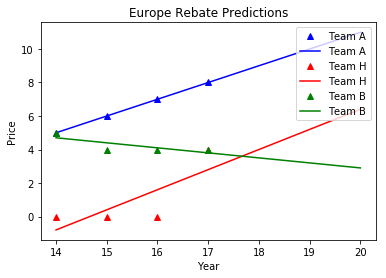

In [20]:
#grab the slope and intercepts
a_eu_rebate_slope,a_eu_rebate_intercept = getSlope(x,y_A_eu_rebate)
h_eu_rebate_slope,h_eu_rebate_intercept = getSlope(x,y_H_eu_rebate)
b_eu_rebate_slope,b_eu_rebate_intercept = getSlope(x,y_B_eu_rebate)

#set the y theoretical
a_y_theor = getYTheor(a_eu_rebate_slope,x_theor,a_eu_rebate_intercept)
h_y_theor = getYTheor(h_eu_rebate_slope,x_theor,h_eu_rebate_intercept)
b_y_theor = getYTheor(b_eu_rebate_slope,x_theor,b_eu_rebate_intercept)

#print the predicted price
print(printPrediction(a_eu_rebate_slope, a_eu_rebate_intercept, 'Team A'))
print(printPrediction(h_eu_rebate_slope, h_eu_rebate_intercept, 'Team H'))
print(printPrediction(b_eu_rebate_slope, b_eu_rebate_intercept, 'Team B'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_A_eu_rebate,marker='^', linestyle='none',color = 'blue', label='Team A')
_ = plt.plot(x_theor,a_y_theor,label = 'Team A', color = 'blue')
_ = plt.plot(x,y_H_eu_rebate,marker='^', linestyle='none',color = 'red', label='Team H')
_ = plt.plot(x_theor,h_y_theor,label = 'Team H', color = 'red')
_ = plt.plot(x,y_B_eu_rebate,marker='^', linestyle='none',color = 'green', label='Team B')
_ = plt.plot(x_theor,b_y_theor,label = 'Team B', color = 'green')

#label the axes
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Europe Rebate Predictions')
plt.show()

### Europe Africa Wholesale Delivery Time
In weeks

Year 20 Team A predicted value: 1.0
Year 20 Team H predicted value: 1.0
Year 20 Team B predicted value: 2.0


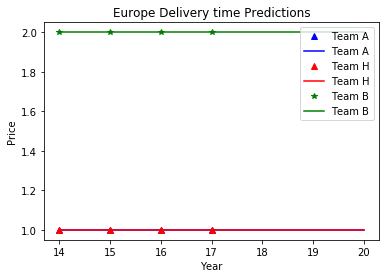

In [21]:
#grab the slope and intercepts
a_eu_delivery_slope,a_eu_delivery_intercept = getSlope(x,y_A_eu_delivery)
h_eu_delivery_slope,h_eu_delivery_intercept = getSlope(x,y_H_eu_delivery)
b_eu_delivery_slope,b_eu_delivery_intercept = getSlope(x,y_B_eu_delivery)

#set the y theoretical
a_y_theor = getYTheor(a_eu_delivery_slope,x_theor,a_eu_delivery_intercept)
h_y_theor = getYTheor(h_eu_delivery_slope,x_theor,h_eu_delivery_intercept)
b_y_theor = getYTheor(b_eu_delivery_slope,x_theor,b_eu_delivery_intercept)

#print the predicted price
print(printPrediction(a_eu_delivery_slope, a_eu_delivery_intercept, 'Team A'))
print(printPrediction(h_eu_delivery_slope, h_eu_delivery_intercept, 'Team H'))
print(printPrediction(b_eu_delivery_slope, b_eu_delivery_intercept, 'Team B'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_A_eu_delivery,marker='^', linestyle='none',color = 'blue', label='Team A')
_ = plt.plot(x_theor,a_y_theor,label = 'Team A', color = 'blue')
_ = plt.plot(x,y_H_eu_delivery,marker='^', linestyle='none',color = 'red', label='Team H')
_ = plt.plot(x_theor,h_y_theor,label = 'Team H', color = 'red')
_ = plt.plot(x,y_B_eu_delivery,marker='*', linestyle='none',color = 'green', label='Team B')
_ = plt.plot(x_theor,b_y_theor,label = 'Team B', color = 'green')

#label the axes
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Europe Delivery time Predictions')
plt.show()

### Europe Africa Wholesale Outlets
In Number of Outlets willing to carry the Company's shoe

Year 20 Team A predicted value: 295.5999999999999
Year 20 Team H predicted value: 468.8000000000002
Year 20 Team B predicted value: 562.1000000000004


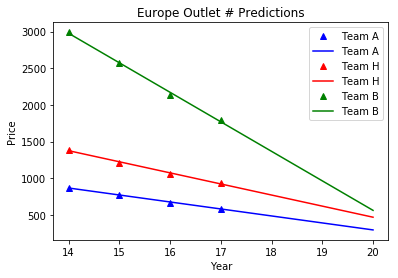

In [23]:
#grab the slope and intercepts
a_eu_outlets_slope,a_eu_outlets_intercept = getSlope(x,y_A_eu_outlets)
h_eu_outlets_slope,h_eu_outlets_intercept = getSlope(x,y_H_eu_outlets)
b_eu_outlets_slope,b_eu_outlets_intercept = getSlope(x,y_B_eu_outlets)

#set the y theoretical
a_y_theor = getYTheor(a_eu_outlets_slope,x_theor,a_eu_outlets_intercept)
h_y_theor = getYTheor(h_eu_outlets_slope,x_theor,h_eu_outlets_intercept)
b_y_theor = getYTheor(b_eu_outlets_slope,x_theor,b_eu_outlets_intercept)

#print the predicted value
print(printPrediction(a_eu_outlets_slope, a_eu_outlets_intercept, 'Team A'))
print(printPrediction(h_eu_outlets_slope, h_eu_outlets_intercept, 'Team H'))
print(printPrediction(b_eu_outlets_slope, b_eu_outlets_intercept, 'Team B'))

#plot the anscombe data and theoretical lines
_ = plt.plot(x,y_A_eu_outlets,marker='^', linestyle='none',color = 'blue', label='Team A')
_ = plt.plot(x_theor,a_y_theor,label = 'Team A', color = 'blue')
_ = plt.plot(x,y_H_eu_outlets,marker='^', linestyle='none',color = 'red', label='Team H')
_ = plt.plot(x_theor,h_y_theor,label = 'Team H', color = 'red')
_ = plt.plot(x,y_B_eu_outlets,marker='^', linestyle='none',color = 'green', label='Team B')
_ = plt.plot(x_theor,b_y_theor,label = 'Team B', color = 'green')

#label the axes
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Europe Outlet # Predictions')
plt.show()